Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [1]:
# Need external libries
!pip install pdpbox
!pip install yfinance

In [2]:
# import the libraries
import yfinance as yf
import numpy as np
import pandas as pd

In [3]:
# Load the stock
aapl = yf.Ticker('T')

# Get the historical data
df = aapl.history(period='max')

In [5]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1983-11-21,0.203010,0.206754,0.203010,0.205090,3910800,0.0,0.0
1983-11-22,0.205090,0.205090,0.203426,0.203426,2934000,0.0,0.0
1983-11-23,0.203426,0.203842,0.201762,0.202594,1618800,0.0,0.0
1983-11-25,0.202594,0.203842,0.202594,0.203010,3380400,0.0,0.0
1983-11-28,0.203010,0.203426,0.200930,0.200930,4315200,0.0,0.0


In [6]:
# Take a look at the data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9305 entries, 1983-11-21 to 2020-10-19
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          9305 non-null   float64
 1   High          9305 non-null   float64
 2   Low           9305 non-null   float64
 3   Close         9305 non-null   float64
 4   Volume        9305 non-null   int64  
 5   Dividends     9305 non-null   float64
 6   Stock Splits  9305 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 581.6 KB


In [7]:
# Add the price change feature
df['Price_Change'] = df['Close'] - df['Close'].shift(1)

In [8]:
# Add the price change feature
df['Volume_Change'] = df['Volume'] - df['Volume'].shift(1)

In [9]:
# Add the price change feature
df['Percentage_Change'] = (((df['Close'] / df['Close'].shift(1))-1)*100)

In [10]:
# Drop the any create from the three features from above
df.dropna(how='any', inplace=True)

In [11]:
# Create the target feature to predict.
# I want to know if the market up or down.
df.loc[df['Price_Change'] >= 0, 'Up_Down'] = 1
df.loc[df['Price_Change'] < 0, 'Up_Down'] = 0
df['Up_Down'] = df['Up_Down'].astype('int')
df['Up_Down'].value_counts(normalize=True)

1    0.541273
0    0.458727
Name: Up_Down, dtype: float64

In [12]:
# Choose your target. Which column in your tabular dataset will you predict?
# I will predict Up_Down

In [13]:
# Is your problem regression or classification?
# It will be a regression

In [14]:
# How is your target distributed?
# The majority class frequency is 53%

In [15]:
# My evaluation metrics.
# r2

In [16]:
# I will train from 1980 to 2004, validate from 2005 to 2014, and test from 2015 to 2019
# I will do time base split.

# get the date column from the index
df['Date'] = df.index

# Split the data
train = df[(df['Date'].dt.year <= 2004)]
val = df[(df['Date'].dt.year >= 2005) & (df['Date'].dt.year <= 2014)]
test = df[(df['Date'].dt.year >= 2015)]

In [17]:
####################### Fisnish retro 1 ####################

In [18]:
####################### Start retro 2 ####################

In [19]:
# Take a look at the data
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5327 entries, 1983-11-22 to 2004-12-31
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Open               5327 non-null   float64       
 1   High               5327 non-null   float64       
 2   Low                5327 non-null   float64       
 3   Close              5327 non-null   float64       
 4   Volume             5327 non-null   int64         
 5   Dividends          5327 non-null   float64       
 6   Stock Splits       5327 non-null   float64       
 7   Price_Change       5327 non-null   float64       
 8   Volume_Change      5327 non-null   float64       
 9   Percentage_Change  5327 non-null   float64       
 10  Up_Down            5327 non-null   int64         
 11  Date               5327 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(2)
memory usage: 541.0 KB


In [20]:
####################### Fisnish retro 2 ####################

In [21]:
####################### Start retro 3 ####################

In [22]:
# Baseline
baseline = train['Up_Down'].value_counts(normalize=True)
print('Majority Baseline:', baseline[1])

Majority Baseline: 0.5485263750703961


In [23]:
# Create the new DataFrame to get the feature list
target = 'Up_Down'
df_drop = train.copy()

# Features DataFrame 
df_drop = df_drop.drop(target,axis=1)

# get the feature columns list
numeric = df_drop.describe().columns.values.tolist()
numeric

['Open',
 'High',
 'Low',
 'Close',
 'Volume',
 'Dividends',
 'Stock Splits',
 'Price_Change',
 'Volume_Change',
 'Percentage_Change']

In [24]:
# Create the list for the Processor
target = 'Up_Down'
df_drop = df.copy()

# get the feature columns list
numerics = df_drop.describe().columns.values.tolist()

# Processor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier


numeric_features = numeric

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])


clf = Pipeline(steps=[('preprocessor', preprocessor),
                  ('classifier', DecisionTreeClassifier())])

In [26]:
# Create the training and test sets
X_train = train.drop(target, axis=1)
y_train = train[target]
X_val = val.drop(target, axis=1)
y_val = val[target]
X_test = test.drop(target, axis=1)
y_test = test[target]

# Fit the model
clf.fit(X_train,y_train)
print('Validation Accuracy', clf.score(X_val, y_val))

Validation Accuracy 1.0


In [27]:
# Import the R2 test
from sklearn.metrics import r2_score

# Do the predict on the test set
y_pred = clf.predict(X_test)

# Get the R2 score
print('The score of R2:',r2_score(y_test,y_pred))

The score of R2: 1.0


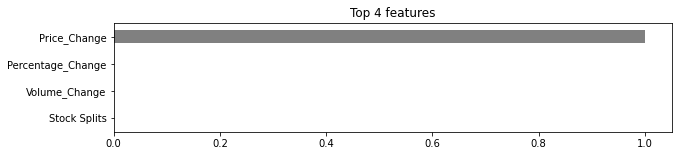

In [28]:
# Features (order in which they were preprocessed)
features_order = numeric_features

importances = pd.Series(clf.steps[1][1].feature_importances_, features_order)

# Plot feature importances
import matplotlib.pyplot as plt

n = 4
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey')

plt.show()

In [29]:
# Permute the values in the more important column
feature = 'Open'

X_test_permuted = X_test.copy()

# Fill in missing values
X_test_permuted[feature].fillna(value = X_test_permuted[feature].median(), inplace=True)

# Permute
X_test_permuted[feature] = np.random.permutation(X_test[feature])

print('Feature permuted: ', feature)
print('Validation Accuracy', clf.score(X_test, y_test))
print('Validation Accuracy (permuted)', clf.score(X_test_permuted, y_test))

Feature permuted:  Open
Validation Accuracy 1.0
Validation Accuracy (permuted) 1.0


In [30]:
# Permute the values in the more important column
feature = 'Volume'

X_test_permuted = X_test.copy()

# Fill in missing values
X_test_permuted[feature].fillna(value = X_test_permuted[feature].median(), inplace=True)

# Permute
X_test_permuted[feature] = np.random.permutation(X_test[feature])

print('Feature permuted: ', feature)
print('Validation Accuracy', clf.score(X_test, y_test))
print('Validation Accuracy (permuted)', clf.score(X_test_permuted, y_test))

Feature permuted:  Volume
Validation Accuracy 1.0
Validation Accuracy (permuted) 1.0


In [31]:
# Remove the date from the data for using XGBoost
X_test = X_test.drop('Date', axis=1)

# Load xgboost and fit the model
from xgboost import XGBClassifier

xg_classifier = XGBClassifier(n_estimators=50, random_state=42)

xg_classifier.fit(X_test,y_test)

print('Validation Accuracy: XGBoost', xg_classifier.score(X_test, y_test))

Validation Accuracy: XGBoost 1.0


In [32]:
####################### Fisnish retro 3 ####################

In [33]:
####################### Start retro 4 ####################

In [34]:
laguz = clf.fit(X_train,y_train)
#X = X_train

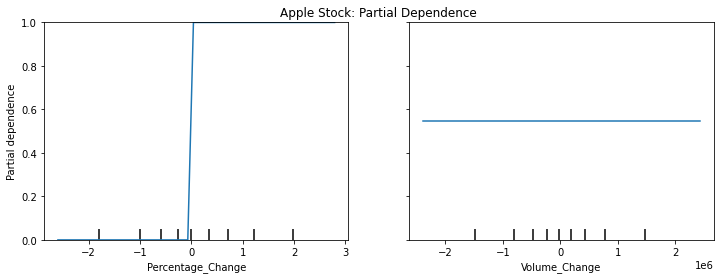

In [35]:
from sklearn.inspection import plot_partial_dependence
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(12,4))
plot_partial_dependence(laguz, feature_names=X_train.columns, 
                        features=['Percentage_Change', 'Volume_Change'], 
                        X=X_train, grid_resolution=50, ax=ax);

ax.set_title('Apple Stock: Partial Dependence');

plt.show();

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


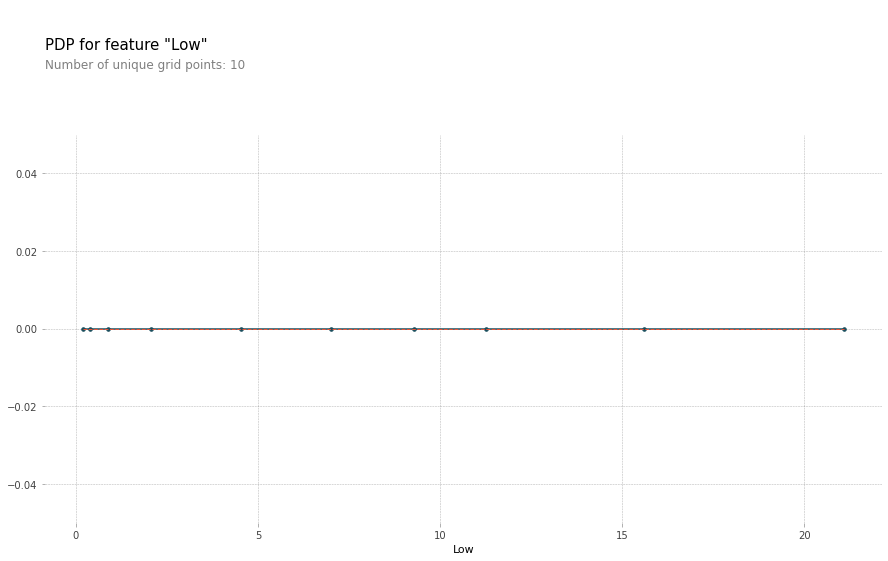

In [36]:
from pdpbox.pdp import pdp_isolate, pdp_plot

# Create the plot for a single feature isolated

isolated = pdp_isolate(
    model= laguz,
    dataset=X_train,
    model_features=X_train.columns,
    feature='Open'
)

pdp_plot(isolated, feature_name='Low');

plt.show();

In [37]:
####################### Fisnish retro 4 ####################